In [47]:
import numpy as np
import matplotlib.pyplot as plt 
import Mesh
import math
import MES

In [48]:
def find_real_space_coordinate(global_number,N, a):
    y = math.floor((global_number-1)/ (2*N+1))
    x = (global_number + y) % (2*N+1 + 1) - 1
    return ((x-N)*a, (y-N)*a)

def MES(dxi,N,a,m,omega):
    n_steps = int(2/dxi) + 1
    psi_realspace = np.zeros((n_steps*(2*N + 1) , n_steps*(2*N + 1),3))
    for element_row in range(1,2*N+1):  #iterates over element rows 
        for j in range(n_steps):    #iterates over dxi_2
            for element_in_row in range(1,2*N+1):  #iterates over element in current element row
                element_number = element_in_row + (element_row-1)*2*N   
                for i in range(n_steps):    #iterates over dxi_1
                    xi_1 = -1 + i*dxi
                    xi_2 = -1 + j*dxi
                    x = Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,1,N),N,a)[0]*(1-xi_1)/2 + \
                        Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,2,N),N,a)[0]*(1+xi_1)/2
                    y =  Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,1,N),N,a)[1]*(1-xi_2)/2 + \
                        Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,3,N),N,a)[1]*(1+xi_2)/2
                    #print(x,y)
                    psi = 0
                    for local in range(1,5):
                        psi += np.exp(m*omega/2*(Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,local,N),N,a)[0]**2 + \
                            Mesh.find_real_space_coordinate(Mesh.find_global_number(element_number,local,N),N,a)[1]**2))*shape_function(xi_1,xi_2,local)
                    psi_realspace[i+(element_in_row-1)*n_steps, j + (element_row-1)*n_steps,0] = x
                    psi_realspace[i+(element_in_row-1)*n_steps, j + (element_row-1)*n_steps,1] = y
                    psi_realspace[i+(element_in_row-1)*n_steps, j + (element_row-1)*n_steps,2] = psi
    return psi_realspace

def f(xi,function_number):
    if function_number == 1:
        return (1-xi)/2
    elif function_number == 2:
        return (1+xi)/2
    else:
        print('Error in shape function f_1')


def shape_function(xi_1, xi_2,local):
    if local == 1:
        return f(xi_1,1)+f(xi_2,1)
    elif local == 2:
        return f(xi_1,2)*f(xi_2,1)
    elif local == 3:
        return f(xi_1,1)*f(xi_2,2)
    elif local == 4:
        return f(xi_1,2)*f(xi_2,2)
    else:
        print('Error in shape functions')

N = 10
L = 100 #[nm]
a = L/(2*N)
m = 0.067
omega = 10. / 27211.6
global_numbers = np.zeros((2*N+1, 2*N+1))
global_numbers = Mesh.create_global_numbers(N,global_numbers)
for i in range(1,4*N**2 + 1):
    for j in range(1,5):
        #print((i,j,Mesh.find_global_number(i,j,N)))
        number = Mesh.find_global_number(i,j,N)
        #print(find_real_space_coordinate(number,N,a))
        

PSI = MES(0.1,N,a, m, omega)

ValueError: Expected 1D or 2D array, got 3D array instead

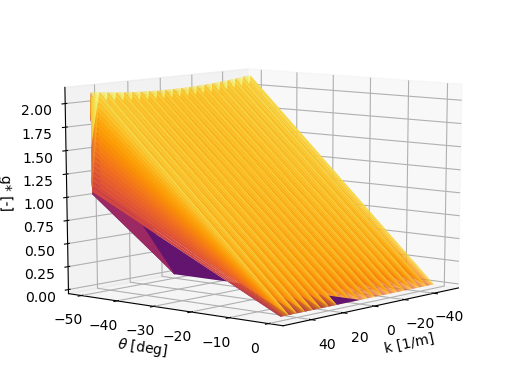

In [ ]:

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
data = PSI 
z,x,y = 
